### 2.Basic Visualization, simple analysis skills  
* draft by __Fang__  
* feel free to adjust, revise anything here below.
>Claim:  
> The file path test_data / train_data need to change if removed.  

In [2]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 


In [3]:
# import data
data = pd.read_csv('../data/manipulated_data_set/full_data.csv', sep=',')

# data: original csv in manipulated_data folder
data.head(5)  

AC   FM   UC   DL   DS   DP     LB  ASTV  MSTV  ALTV  ...    Max  Nmax  \
0  0.0  0.0  0.0  0.0  0.0  0.0  120.0  73.0   0.5  43.0  ...  126.0   2.0   
1  4.0  0.0  4.0  2.0  0.0  0.0  132.0  17.0   2.1   0.0  ...  198.0   6.0   
2  2.0  0.0  5.0  2.0  0.0  0.0  133.0  16.0   2.1   0.0  ...  198.0   5.0   
3  2.0  0.0  6.0  2.0  0.0  0.0  134.0  16.0   2.4   0.0  ...  170.0  11.0   
4  4.0  0.0  5.0  0.0  0.0  0.0  132.0  16.0   2.4   0.0  ...  170.0   9.0   

   Nzeros   Mode   Mean  Median  Variance  Tendency  CLASS  NSP  
0     0.0  120.0  137.0   121.0      73.0       1.0    9.0  2.0  
1     1.0  141.0  136.0   140.0      12.0       0.0    6.0  1.0  
2     1.0  141.0  135.0   138.0      13.0       0.0    6.0  1.0  
3     0.0  137.0  134.0   137.0      13.0       1.0    6.0  1.0  
4     0.0  137.0  136.0   138.0      11.0       1.0    2.0  1.0  

[5 rows x 23 columns]

1. __Basic Visualization__  
* 1.1 numerical variables  

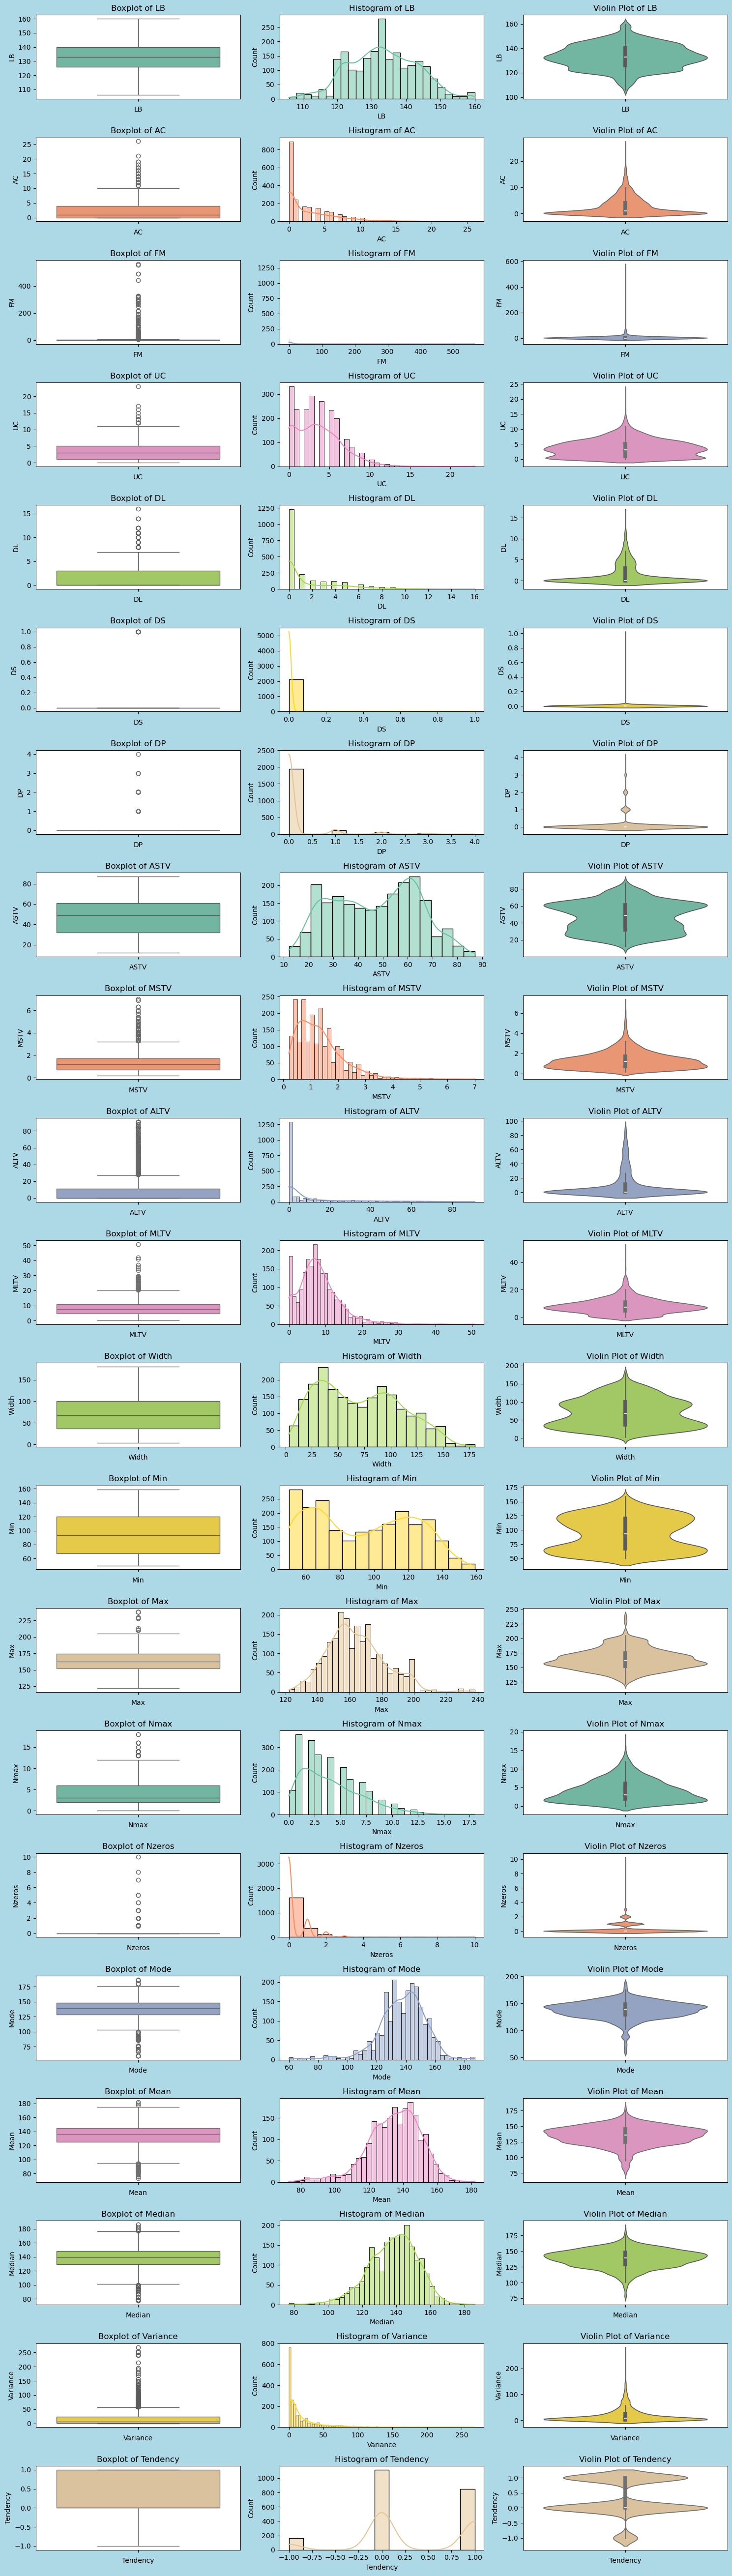

In [ ]:
# Extract the numeric variables
numeric_data = pd.DataFrame(data[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 
    'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 
    'Variance', 'Tendency']])

num_vars = numeric_data.columns
num_plots = len(num_vars)
rows = num_plots
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2.5))
fig.patch.set_facecolor('lightblue') 

colors = sb.color_palette("Set2", 7) 

for i, var in enumerate(num_vars):
    # Boxplot
    sb.boxplot(data=numeric_data[var], ax=axes[i, 0], color=colors[i % len(colors)])
    axes[i, 0].set_title(f"Boxplot of {var}")
    axes[i, 0].set_xlabel(var)

    # Histplot
    sb.histplot(data=numeric_data[var], kde=True, ax=axes[i, 1], color=colors[i % len(colors)])
    axes[i, 1].set_title(f"Histogram of {var}")
    axes[i, 1].set_xlabel(var)

    # Vio plot
    sb.violinplot(data=numeric_data[var], ax=axes[i, 2], color=colors[i % len(colors)])
    axes[i, 2].set_title(f"Violin Plot of {var}")
    axes[i, 2].set_xlabel(var)

plt.tight_layout()
plt.show()

* 1.2 categrical data

C:\Users\18904\AppData\Local\Temp\ipykernel_14796\102637838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=col, data=data, ax=axes[i], palette=colors)
C:\Users\18904\AppData\Local\Temp\ipykernel_14796\102637838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=col, data=data, ax=axes[i], palette=colors)
C:\Users\18904\AppData\Local\Temp\ipykernel_14796\102637838.py:9: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sb.countplot(x=col, data=data, ax=axes[i], palette=colors)
C:\Users\18904\AppData\Local\Temp\ipykernel_14796\102637838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` 

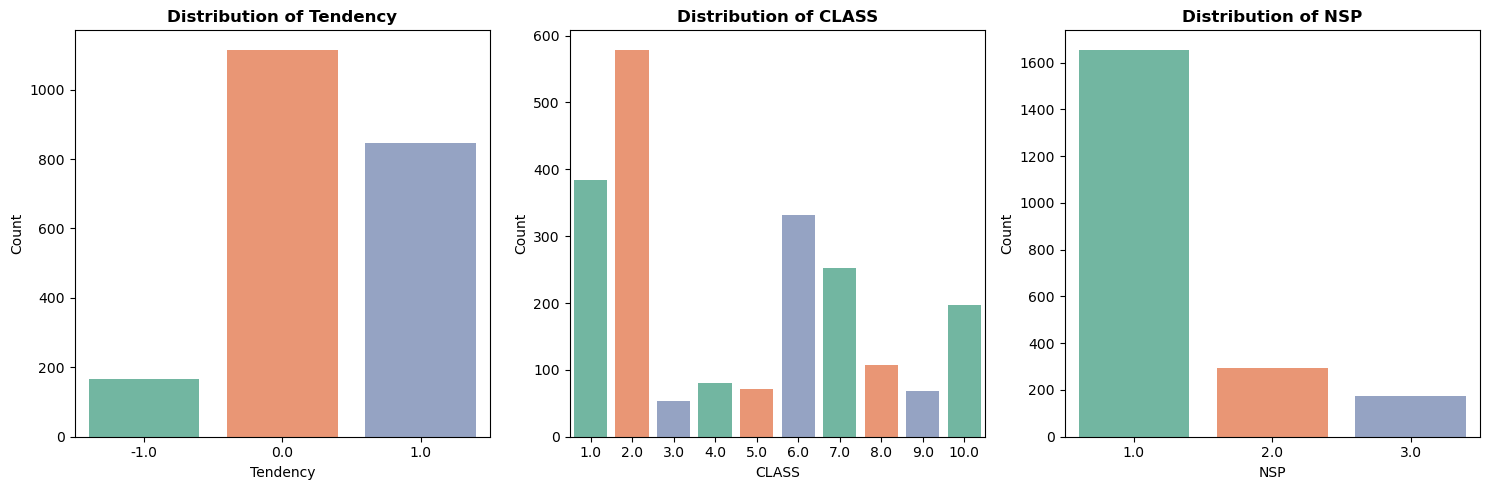

In [7]:
# Extract Categorical Variables
categorical_cols = ['Tendency', 'CLASS', 'NSP']  # Replace with your categorical variables
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(15, 5))  # Adjust layout for categorical variables
axes = axes.flatten()

colors = sb.color_palette("Set2", len(categorical_cols))  # Use Set2 color palette

for i, col in enumerate(categorical_cols):
    sb.countplot(x=col, data=data, ax=axes[i], palette=colors)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

2. Bi-variate Visualization  

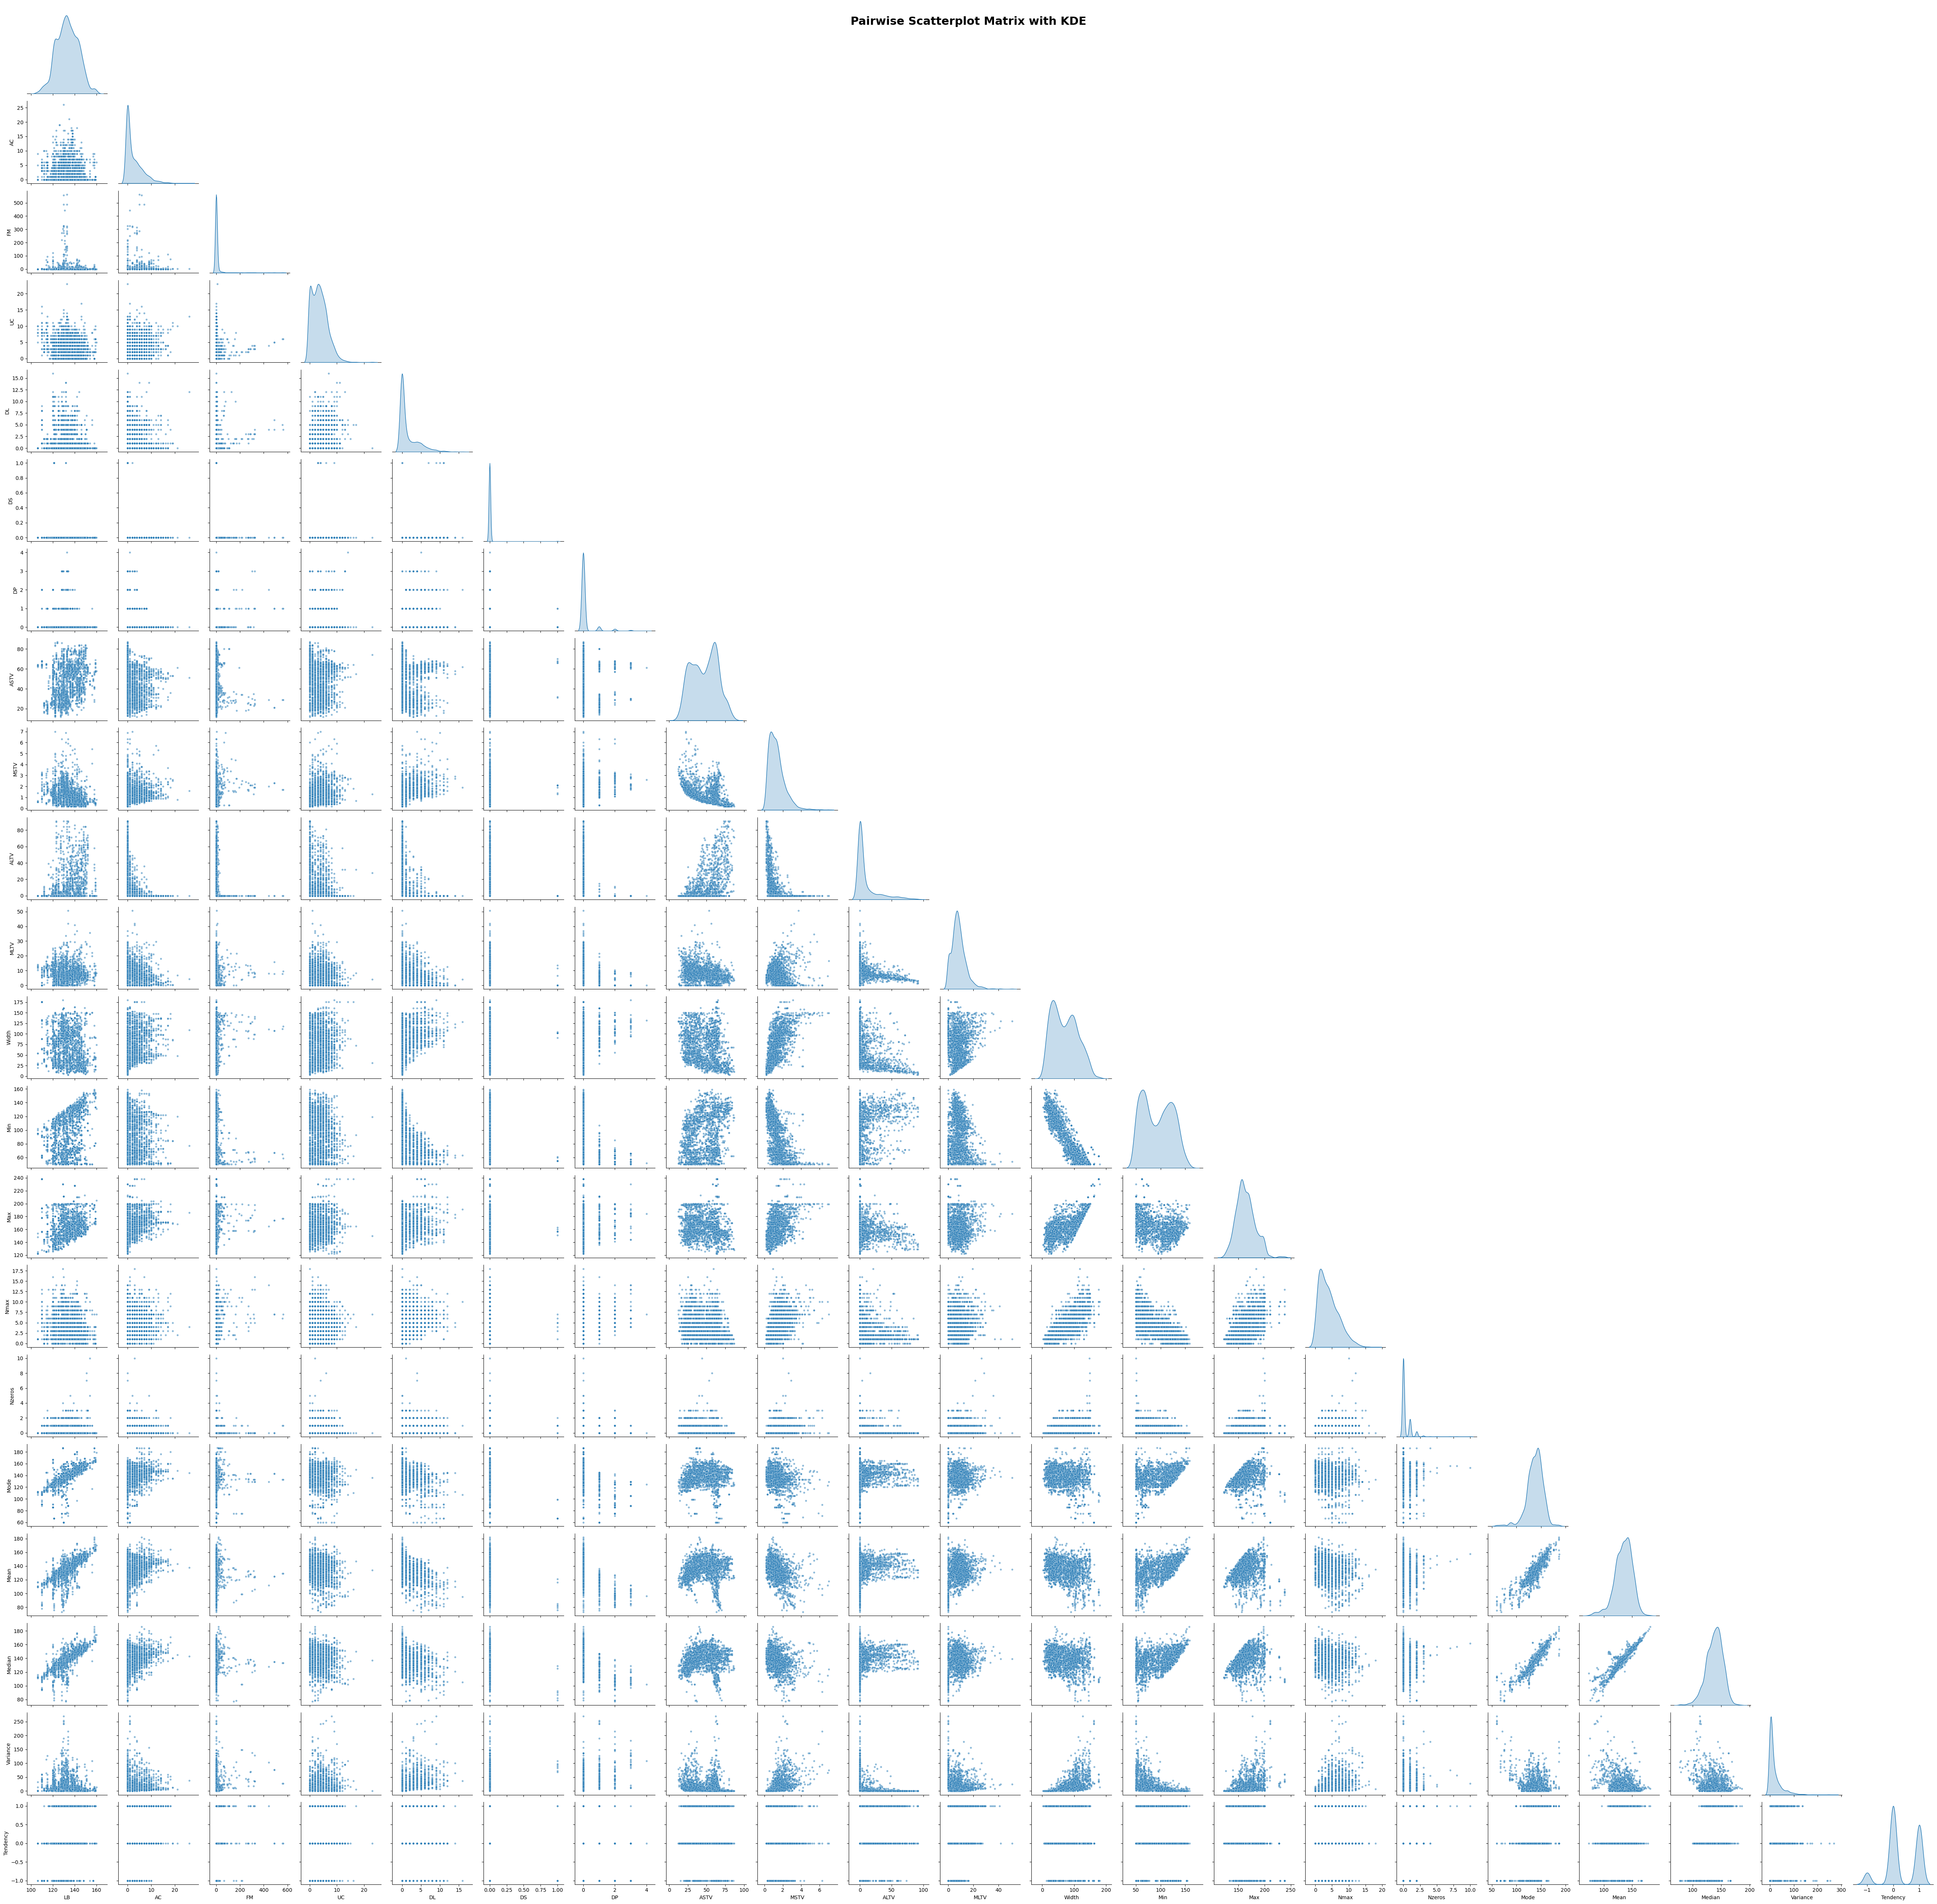

In [4]:
# Extract the numeric variables for pairwise scatterplot matrix
numeric_data = data[["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV", "MLTV", 
                     "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", 
                     "Variance", "Tendency"]]

# Create pairplot with scatterplots and KDE on the diagonal
sb.pairplot(numeric_data, kind='scatter', diag_kind='kde', corner=True, plot_kws={'alpha': 0.5, 's': 15})
plt.suptitle('\nPairwise Scatterplot Matrix with KDE\n', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

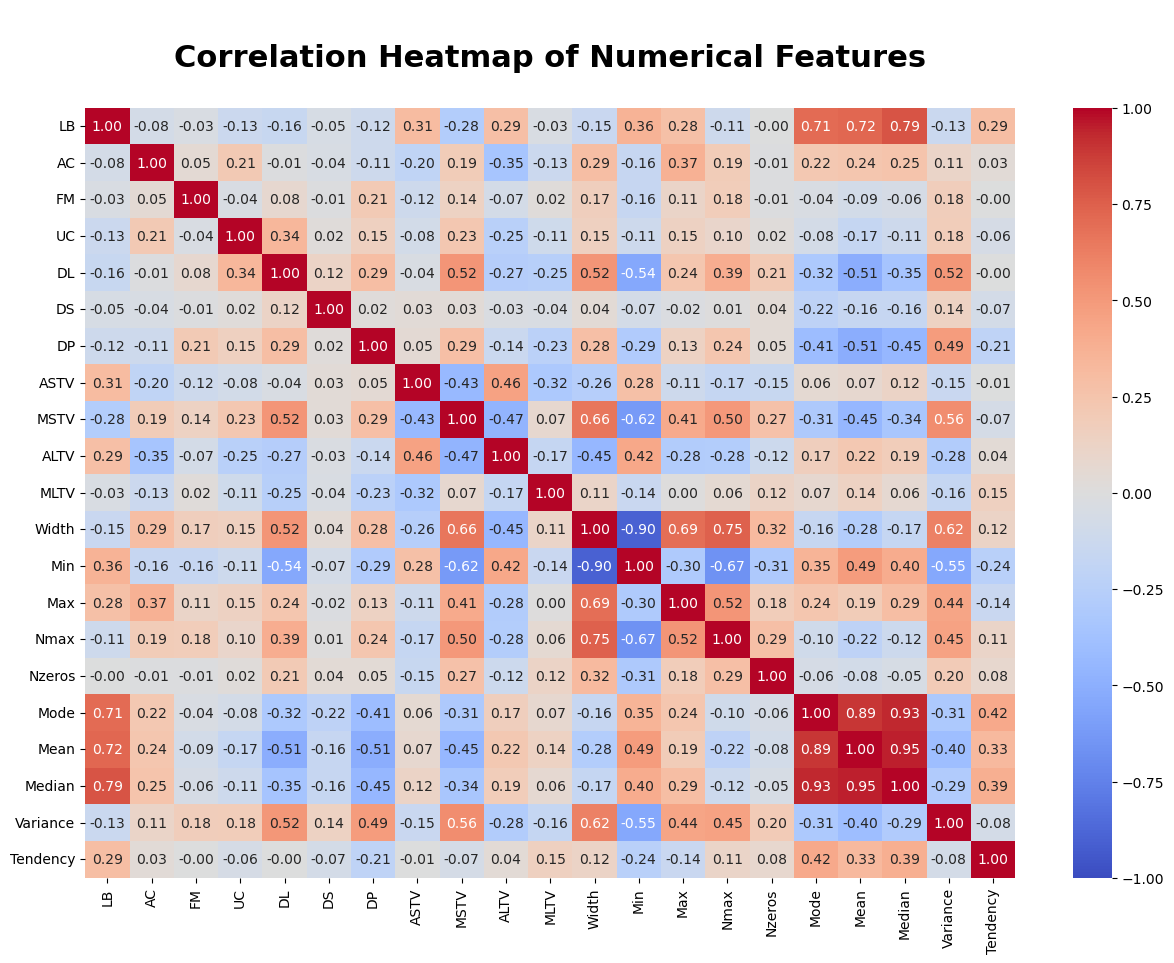

In [5]:
# Select numerical columns
numerical_cols = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV", "MLTV", 
                  "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", 
                  "Variance", "Tendency"]

# Compute correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmax=1, vmin=-1)
plt.title('\nCorrelation Heatmap of Numerical Features\n', fontsize=22, fontweight='bold')
plt.show()